In [2]:
import numpy as np
import pandas as pd
import csv
with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
original_datei = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(original_datei)
#Einlesen

letzter_buchstabe = []
for index, row in original_datei.iterrows():
    last_character = row["mutant"][-1]
    letzter_buchstabe.append(last_character)
letzter_buchstabe_df = pd.DataFrame(letzter_buchstabe, columns=["New_AS"])
#print(letzter_buchstabe_df)
#Letzter Buchstabe in jeder Zeile

number_mutations = original_datei["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#print(number_mutations_Single)
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df = letzter_buchstabe_df[number_mutations_Single]
#print(single_mutants_df)
#Filtert alle True Zeilen aus beiden Dataframes und erstellt ein neues Dataframe. Er übernimmt automatisch die Filterung nac
dms_score_df = []
for index, row in original_datei.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
#print(dms_score_df_alle)
#erstellt Dataframe mit allen DMS-scores und der jeweiligen Experimentnummer
dms_score_filtered = dms_score_df_alle[number_mutations_Single]
#print(dms_score_filtered)
dms_score_filtered_newAS = single_mutants_df.join(dms_score_filtered)
#print(dms_score_filtered_newAS)
mutations_pos = []
for index, row in original_datei.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
#print(mutations_pos_df)
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = original_datei["mutant"].str.count(":") + 1
number_mutations_Single = number_mutations == 1
#print(number_mutations_Single)
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_df_pos = mutations_pos_df[number_mutations_Single]
#print(single_mutants_df_pos)
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt
mutations_pos_df_mit_scores = single_mutants_df_pos.join(dms_score_filtered)
#print(mutations_pos_df_mit_scores)
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]
print(Roman_1)
#Erstellt neues Dataframe mit Position, neuer AS und DMS-score

      Position New_AS  Fitness_Score
4            3      R       3.738586
48           3      Q       3.750487
703          3      E       3.666278
924          3      M       3.698336
1160         3      T       3.629775
...        ...    ...            ...
51709      237      N       3.809468
51710      237      C       3.760217
51711      237      D       3.754101
51712      237      F       3.673173
51713      237      H       3.735417

[1084 rows x 3 columns]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['S30T:K107R:K156Q:I167T:M233V', 'MSKGEELFTGVVPILVELDGDVNGHKFSVTGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYRTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADQQKNGIKVNFKTRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGVDELYK', '3.63810723268', '1']
['S30T:K107R:D155G:S205T', 'MSKGEELFTGVVPILVELDGDVNGHKFSVTGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYRTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMAGKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQTALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.47316763945', '1']
['S30T:K101R:K107E:E115V:N135D:K209R:K214E', 'MSKGEELFTGVVPILVELDGDVNGHKFSVTGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFRDDGNYETRAEVKFVGDTLVNRIELKGIDFKEDGDILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSRDPNEERDHMVLLEFVTAAGITHGMDELYK', '3.30066585237', '1']
['S30T:L42Q:N144D', 'MSKGEELFTGVVPILVELDGDVNGHKFSVTGEGEGDATYGKQTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHD

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['F71L:V163A:L201M:S202G', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCLSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKANFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYMGTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.5430808991800005', '1']
['F71L:V163A:D190N', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCLSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKANFKIRHNIEDGSVQLADHYQQNTPIGNGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.55433211944', '1']
['F71L:T97S:Y145H:H231Y', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCLSRYPDHMKQHDFFKSAMPEGYVQERSIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNHNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITYGMDELYK', '3.5119580334900005', '1']
['F71L:T97S:V112G:K113E:E124G:S147C:Q183P:T186A:V219A', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYG

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['K131M:Y182H:T230A', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFMEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHHQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGIAHGMDELYK', '3.59250650696', '1']
['K131M:T230A:M233T', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFMEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGIAHGTDELYK', '3.68624553727', '1']
['K131M:S208G', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFMEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALGKDPNEKRDHMVLLEFVTAAGITHGMDELYK', '3.65019320704', '1']
['K131M:S147G:I167T:D173N', 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTL

In [3]:
#Test, ob Normalverteilt
from scipy.stats import shapiro
# Shapiro-Wilk-Test
stat, p = shapiro(Roman_1["Fitness_Score"])
alpha = 0.05

if p > alpha:
     print("Daten sind normalverteilt (H0 nicht ablehnen)")
else:
     print("Daten sind nicht normalverteilt (H0 ablehnen)")
print()
print(p)

Daten sind nicht normalverteilt (H0 ablehnen)

0.0


In [17]:
# Gruppierung nach 'New_AS' und 'Position'
groups = Roman_1.groupby(['New_AS', 'Position'])
print(groups)

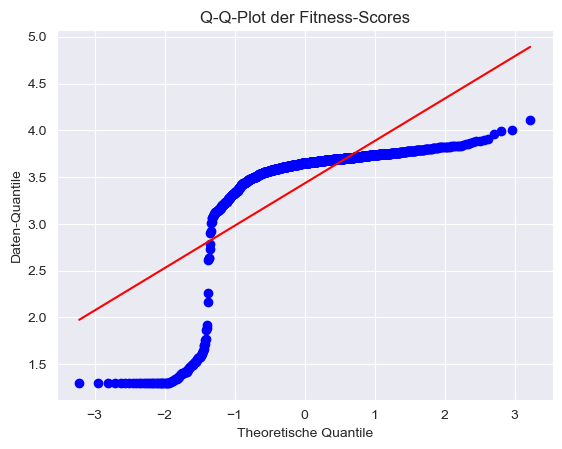

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Extrahiert die Spalte mit den Fitness-Scores
fitness_scores = Roman_1['Fitness_Score'].values

# Q-Q-Plot erstellen
probplot(fitness_scores, dist="norm", plot=plt)

# Beschriftungen hinzufügen
plt.title("Q-Q-Plot der Fitness-Scores")
plt.xlabel("Theoretische Quantile")
plt.ylabel("Daten-Quantile")

# Plot anzeigen
plt.show()


In [5]:
from scipy.stats import mannwhitneyu

# Gruppen basierend auf Position erstellen
grouped_position = Roman_1.groupby('Position')

# Schleife über die Positionen
for position, group_data in grouped_position:
    # Gruppen basierend auf Aminosäure für jede Position erstellen
    grouped_amino_acid = group_data.groupby('New_AS')

    # Schleife über die Aminosäuren für jede Position
    for amino_acid, group in grouped_amino_acid:
        # Fitness-Scores für die aktuelle Position und Aminosäure
        fitness_scores = group['Fitness_Score'].values

        # Wilcoxon-Rangsummentest
        statistic, p_value = mannwhitneyu(fitness_scores, alternative='two-sided')

        alpha = 0.05

        print(f"Position: {position}, Aminosäure: {amino_acid}")
        print(f"Wilcoxon-Rangsummentest")
        print(f"Teststatistik: {statistic}")
        print(f"P-Wert: {p_value}")

        if p_value < alpha:
            print("Es gibt einen signifikanten Unterschied.")
        else:
            print("Es gibt keinen signifikanten Unterschied.")

        print()


KeyError: 'y'

In [8]:
from scipy.stats import ranksums

# Gruppen basierend auf Position erstellen
grouped_position = Roman_1.groupby('Position')

# Schleife über die Positionen
for position, group_data in grouped_position:
    # Gruppen basierend auf Aminosäure für jede Position erstellen
    grouped_amino_acid = group_data.groupby('New_AS')

    # Schleife über die Aminosäuren für jede Position
    for amino_acid, group in grouped_amino_acid:
        # Fitness-Scores für die aktuelle Position und Aminosäure
        fitness_scores = group['Fitness_Score'].values

        # Wilcoxon-Rangsummentest
        statistic, p_value = ranksums(fitness_scores, alternative='two-sided')


        alpha = 0.05

        print(f"Position: {position}, Aminosäure: {amino_acid}")
        print(f"Wilcoxon-Rangsummentest")
        print(f"Teststatistik: {statistic}")
        print(f"P-Wert: {p_value}")

        if p_value < alpha:
            print("Es gibt einen signifikanten Unterschied.")
        else:
            print("Es gibt keinen signifikanten Unterschied.")

        print()


KeyError: 'y'

In [7]:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
import scipy.stats as stats

#Whitney-U-Test
stats.mannwhitneyu(group1, group2, alternative='two-sided')


MannwhitneyuResult(statistic=50.0, pvalue=0.21138945901258455)

In [11]:
import scipy.stats as stats

grouped_position = Roman_1.groupby('Position')
grouped_AS = Roman_1.groupby("New_AS")

for position, group_position in grouped_position:
    for AS, group_AS in grouped_AS:
        fitness_scores_position = group_position['Fitness_Score'].values
        fitness_scores_AS = group_AS['Fitness_Score'].values

        statistic, p_value = stats.mannwhitneyu(fitness_scores_position, fitness_scores_AS, alternative='two-sided')

        alpha = 0.05

        print(f"Position: {position}, Aminosäure: {AS}")
        print(f"Wilcoxon-Mann-Whitney-Test")
        print(f"Teststatistik: {statistic}")
        print(f"P-Wert: {p_value}")

        if p_value < alpha:
            print("Es gibt einen signifikanten Unterschied.")
        else:
            print("Es gibt keinen signifikanten Unterschied.")

        print()


Position: 10, Aminosäure: A
Wilcoxon-Mann-Whitney-Test
Teststatistik: 126.0
P-Wert: 0.42052412420826035
Es gibt keinen signifikanten Unterschied.

Position: 10, Aminosäure: C
Wilcoxon-Mann-Whitney-Test
Teststatistik: 67.0
P-Wert: 0.36741896758703485
Es gibt keinen signifikanten Unterschied.

Position: 10, Aminosäure: D
Wilcoxon-Mann-Whitney-Test
Teststatistik: 97.0
P-Wert: 0.7162236391680545
Es gibt keinen signifikanten Unterschied.

Position: 10, Aminosäure: E
Wilcoxon-Mann-Whitney-Test
Teststatistik: 69.5
P-Wert: 0.46519743287209736
Es gibt keinen signifikanten Unterschied.

Position: 10, Aminosäure: F
Wilcoxon-Mann-Whitney-Test
Teststatistik: 53.0
P-Wert: 0.810850439882698
Es gibt keinen signifikanten Unterschied.

Position: 10, Aminosäure: G
Wilcoxon-Mann-Whitney-Test
Teststatistik: 95.0
P-Wert: 0.4116480534390982
Es gibt keinen signifikanten Unterschied.

Position: 10, Aminosäure: H
Wilcoxon-Mann-Whitney-Test
Teststatistik: 74.0
P-Wert: 0.3872982363548401
Es gibt keinen signifikan

In [13]:
summary_df = summary_df.sort_values('Position', ascending=True)
# Sortieren nach Position
print(summary_df)

     Position Aminosäure  Teststatistik    P-Wert Signifikanz
0          10          A          126.0  0.420524        Nein
19         10          Y           55.0  0.255891        Nein
18         10          W            5.5  1.000000        Nein
17         10          V           92.5  0.159342        Nein
16         10          T           68.0  0.131766        Nein
...       ...        ...            ...       ...         ...
4641       99          C          178.5  0.298956        Nein
4640       99          A          399.0  0.014950          Ja
4658       99          W           16.0  0.095238        Nein
4648       99          K          140.0  0.053803        Nein
4659       99          Y          188.5  0.071935        Nein

[4660 rows x 5 columns]


In [15]:
import pandas as pd
import scipy.stats as stats
#Ich will meine Werte sortieren
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position
#Leere Liste
results = []
#Gruppierung basierend auf Position und Aminosäure
grouped_position = Roman_1.groupby('Position')
grouped_AS = Roman_1.groupby("New_AS")

# Konvertiert die Positionsspalte in numerische Werte
Roman_1['Position'] = pd.to_numeric(Roman_1['Position'])

#Whitney-Test für alle Kombinationen von Position und AS durchgeführt --> Signifikanter Unterschied in den Fitness-Scores zwischen verschiedenen Positionen und AS?
for position, group_position in grouped_position:
    for AS, group_AS in grouped_AS:
        fitness_scores_position = group_position['Fitness_Score'].values
        fitness_scores_AS = group_AS['Fitness_Score'].values

        statistic, p_value = stats.mannwhitneyu(fitness_scores_position, fitness_scores_AS, alternative='two-sided')
#Alpha-Wert selbst gesetzt
        alpha = 0.05

        result = {'Position': position,'Aminosäure': AS,'Teststatistik': statistic,'P-Wert': p_value,'Signifikanz': "Ja" if p_value < alpha else "Nein"}

        results.append(result)
#Ergebnisse ausspucken lassen
summary_df = pd.DataFrame(results)
#Sortieren nach aufsteigender Positionsnummer
summary_df = summary_df.sort_values('Position', ascending=True)
print(summary_df)

#Wenn p-Wert <0,05 (alpha), dann signifikant --> Fitness-Score zwischen den Gruppen nicht gleich

##Wenn der p-Wert klein ist (typischerweise kleiner als 0,05), deutet dies darauf hin, dass es einen statistisch signifikanten Unterschied in den Fitness-Scores zwischen den Positionen und Aminosäuren gibt.

##Wenn der p-Wert größer als 0,05 ist, wird die Nullhypothese beibehalten, was bedeutet, dass kein statistisch signifikanter Unterschied in den Fitness-Scores zwischen den Positionen und Aminosäuren vorliegt.

#Verwendet für große Stichproben und nicht normalverteilt

#Der Mann-Whitney-U-Test wird verwendet, um zu prüfen, ob es statistisch signifikante Unterschiede in den Verteilungen der Fitness-Scores zwischen den Positionen und Aminosäuren gibt.

#Nullhypothese: Es gibt keinen signifikanten Unterschied in den Fitness-Scores zwischen den verschiedenen Positionen und Aminosäuren.

      Position Aminosäure  Teststatistik    P-Wert Signifikanz
0            3          A          309.0  0.079040        Nein
19           3          Y          144.0  0.232238        Nein
18           3          W           13.0  0.142857        Nein
17           3          V          255.0  0.318906        Nein
16           3          T          193.5  0.404197        Nein
...        ...        ...            ...       ...         ...
4641       237          C          175.5  0.074290        Nein
4640       237          A          368.0  0.002568          Ja
4658       237          W           14.0  0.071429        Nein
4648       237          K          137.0  0.004080          Ja
4659       237          Y          177.0  0.016339          Ja

[4660 rows x 5 columns]


In [20]:
# Überprüft, ob Position und Aminosäure in Roman_1 vorhanden sind
mask = summary_df.apply(lambda row: (row['Position'], row['Aminosäure']) in zip(Roman_1['Position'], Roman_1['New_AS']), axis=1)

# Filtert das summary_df entsprechend der Maske
summary_df_filtered = summary_df[mask]

print(summary_df_filtered)


      Position Aminosäure  Teststatistik    P-Wert Signifikanz
16           3          T          193.5  0.404197        Nein
13           3          Q          129.5  0.349664        Nein
10           3          M          116.5  0.493878        Nein
14           3          R          262.5  0.199731        Nein
3            3          E          158.5  0.141178        Nein
...        ...        ...            ...       ...         ...
4651       237          N          275.5  0.007773          Ja
4646       237          H          216.5  0.010993          Ja
4644       237          F          123.5  0.014056          Ja
4642       237          D          243.5  0.004776          Ja
4641       237          C          175.5  0.074290        Nein

[1084 rows x 5 columns]


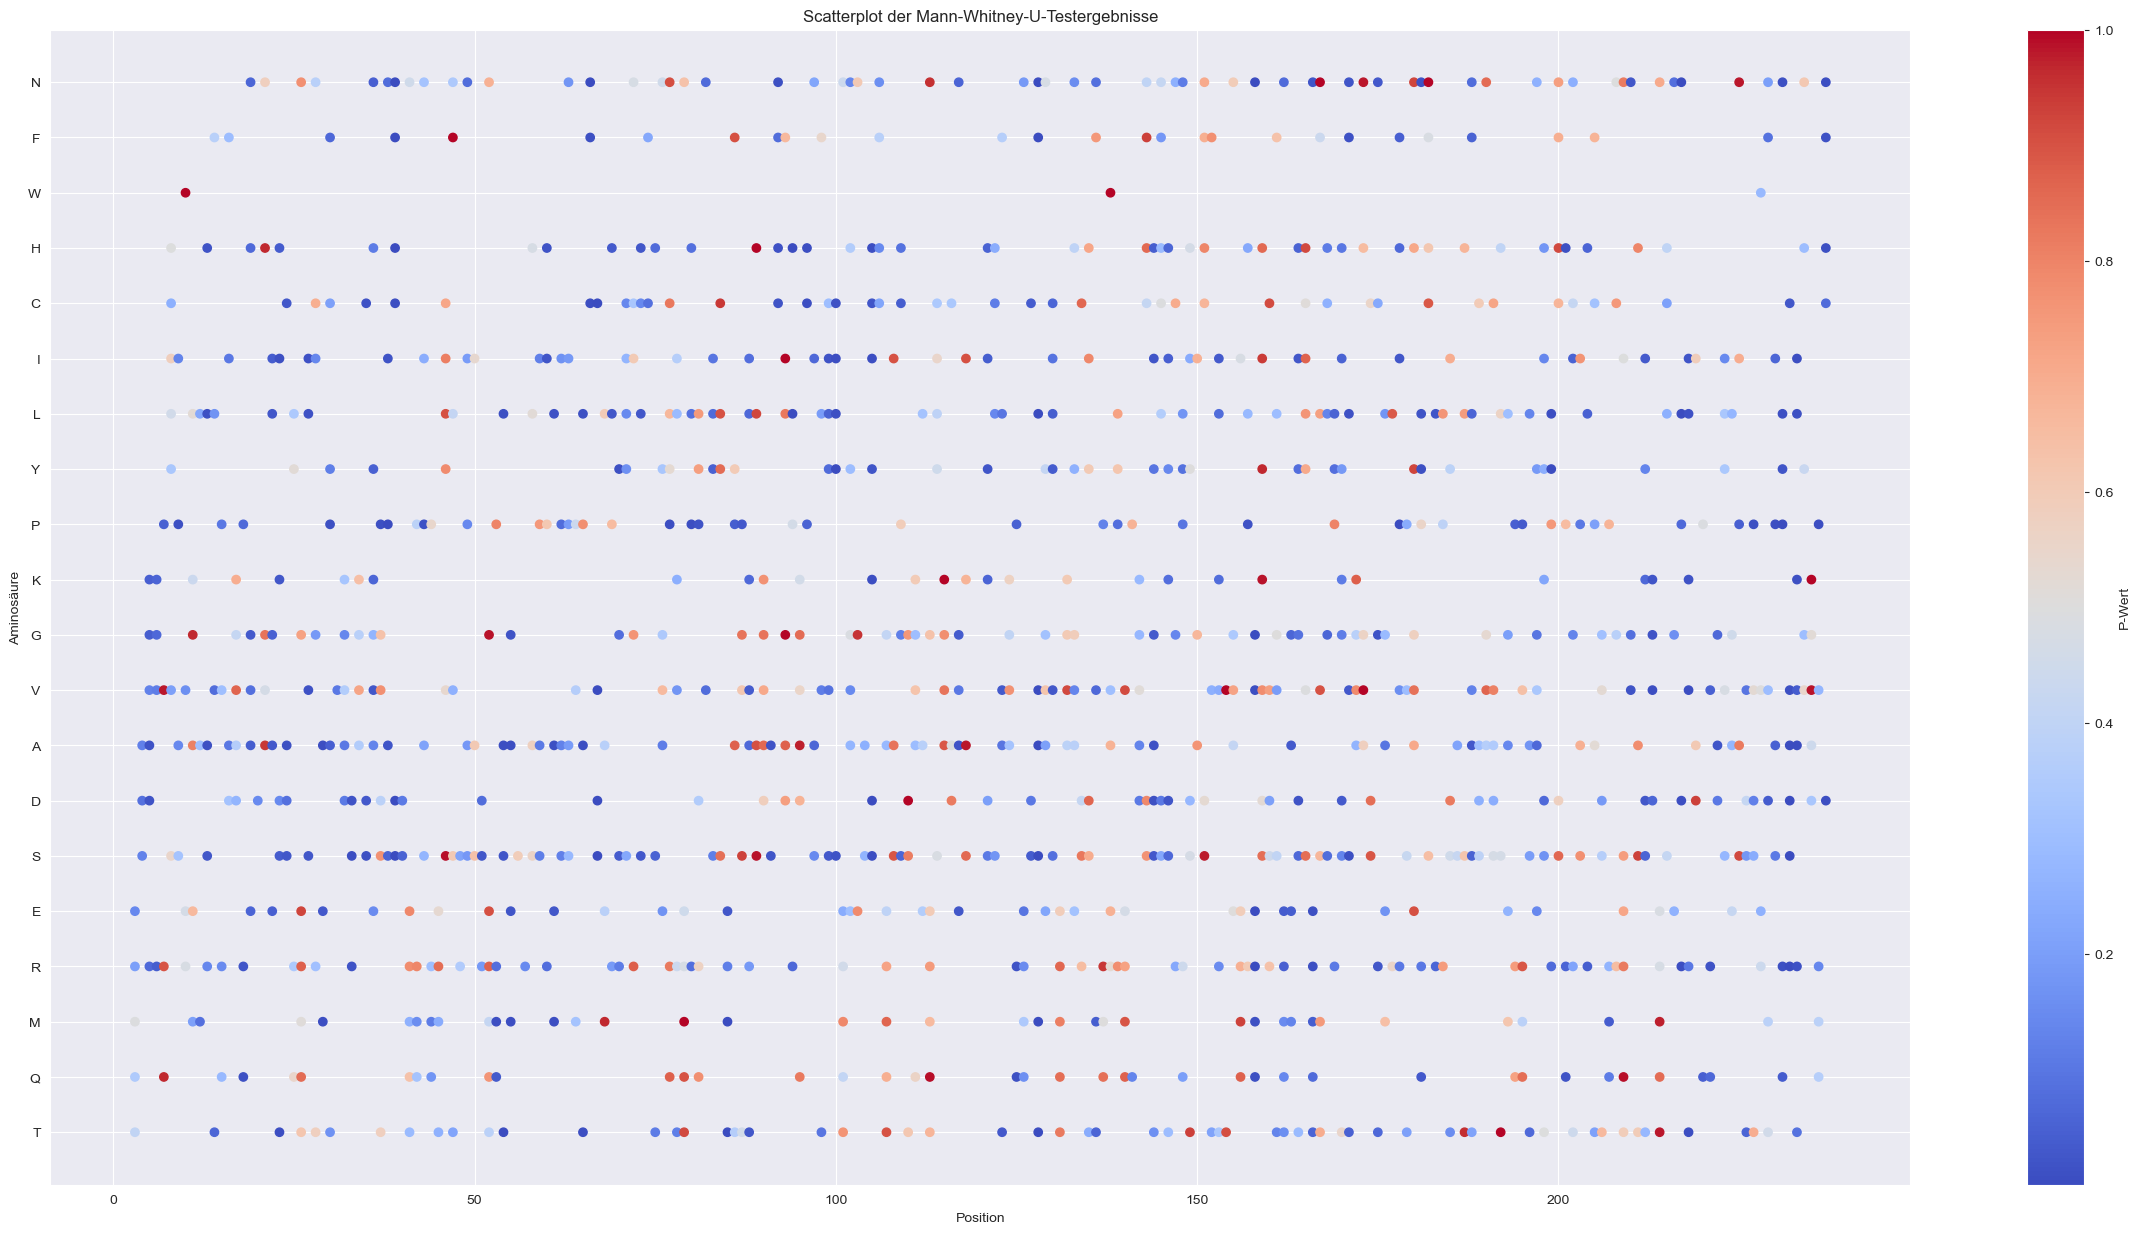

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: 'summary_df' ist das DataFrame mit den Ergebnissen des Mann-Whitney-U-Tests

# Scatterplot erstellen
plt.figure(figsize=(30, 15))  # Größe des Plots anpassen

# Position und Aminosäure auf den Achsen darstellen
plt.scatter(summary_df_filtered['Position'], summary_df_filtered['Aminosäure'], c=summary_df_filtered['P-Wert'], cmap='coolwarm')

# Achsentitel und Titel des Plots festlegen
plt.xlabel('Position')
plt.ylabel('Aminosäure')
plt.title('Scatterplot der Mann-Whitney-U-Testergebnisse')

# Farbskala hinzufügen
cbar = plt.colorbar()
cbar.set_label('P-Wert')

# Plot anzeigen
plt.show()


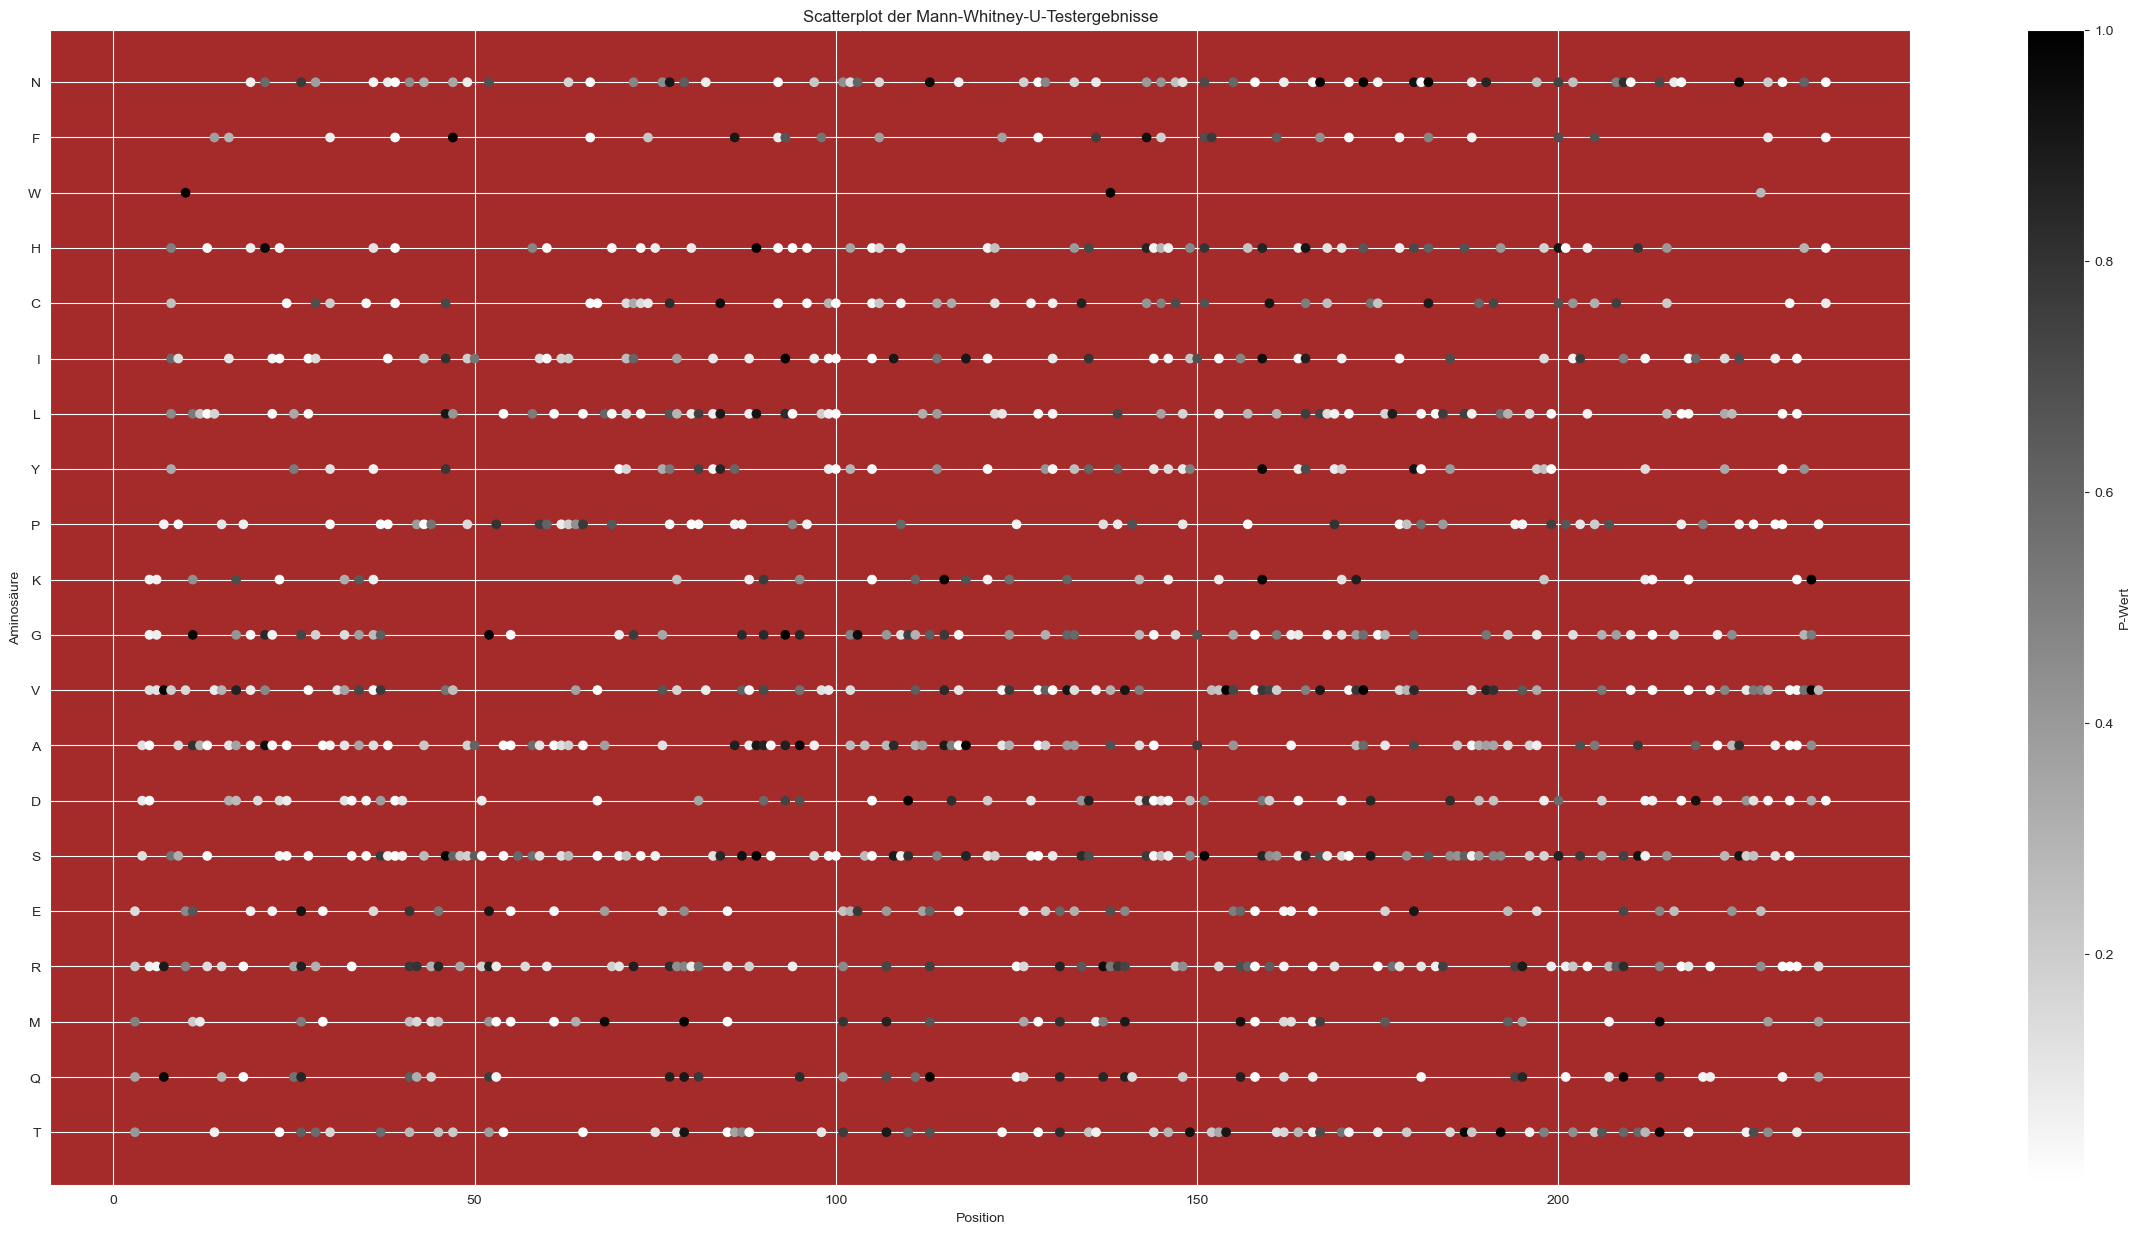

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatterplot erstellen
plt.figure(figsize=(30, 15))  # Größe des Plots anpassen

# Position und Aminosäure auf den Achsen darstellen
plt.scatter(summary_df_filtered['Position'], summary_df_filtered['Aminosäure'], c=summary_df_filtered['P-Wert'], cmap='binary')

# Achsentitel und Titel des Plots festlegen
plt.xlabel('Position')
plt.ylabel('Aminosäure')
plt.title('Scatterplot der Mann-Whitney-U-Testergebnisse')

# Farbskala hinzufügen
cbar = plt.colorbar()
cbar.set_label('P-Wert')

# Hintergrundfarbe ändern
plt.gca().set_facecolor('brown')

# Plot anzeigen
plt.show()

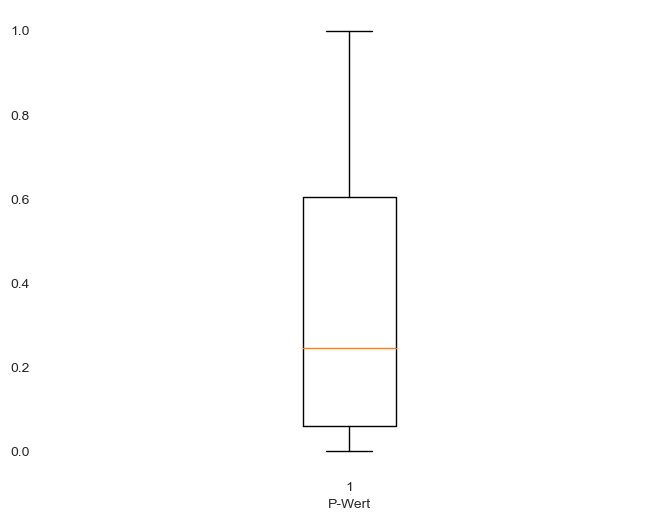

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Boxplots erstellen
plt.figure(figsize=(8, 6))  # Größe des Plots anpassen

# Position und Aminosäure auf den Achsen darstellen
plt.boxplot(summary_df_filtered['P-Wert'], vert=True)

# Achsentitel und Titel des Plots festlegen
plt.xlabel('P-Wert')
plt.ylabel('')

# Hintergrundfarbe ändern
plt.gca().set_facecolor('white')

# Plot anzeigen
plt.show()


In [33]:
#Der Kruskal-Wallis-Test ist eine nichtparametrische Methode, die auf Ränge basiert und daher keine Annahmen über die Verteilung der Daten macht. Er ermöglicht den Vergleich der Verteilungen zwischen mehreren Gruppen, unabhängig von ihrer Normalverteilung oder Varianzhomogenität.
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position erstellen
grouped_position_2 = Roman_1.groupby('Position')

# Liste zum Speichern der Fitness-Scores für jede Position
position_scores = []

# Schleife über die Positionen
for position, group_data in grouped_position_2:
    # Fitness-Scores für die aktuelle Position
    fitness_scores = group_data['Fitness_Score'].values
    position_scores.append(fitness_scores)

# Kruskal-Wallis-Test
statistic, p_value = stats.kruskal(*position_scores)

alpha = 0.05

print("Kruskal-Wallis-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen.")


Kruskal-Wallis-Test
Teststatistik: 577.8469817125756
P-Wert: 1.8399990857612868e-31
Es gibt einen signifikanten Unterschied zwischen den Positionen.


In [34]:
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position und Aminosäure erstellen
grouped_position_as_2 = Roman_1.groupby(['Position', 'New_AS'])

# Liste zum Speichern der Fitness-Scores für jede Position und Aminosäure
position_as_scores = []

# Schleife über die Positionen und Aminosäuren
for (position, amino_acid), group_data in grouped_position_as_2:
    # Fitness-Scores für die aktuelle Position und Aminosäure
    fitness_scores = group_data['Fitness_Score'].values
    position_as_scores.append(fitness_scores)
#Die Fitness-Scores für jede Position und Aminosäure werden in einer Liste gespeichert und als Argumente für den Kruskal-Wallis-Test verwendet
# Kruskal-Wallis-Test
statistic, p_value = stats.kruskal(*position_as_scores)

alpha = 0.05

print("Kruskal-Wallis-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")


Kruskal-Wallis-Test
Teststatistik: 1083.0
P-Wert: 0.49428529234990104
Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.


In [35]:
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position und Aminosäure erstellen
grouped_position_as_3 = Roman_1.groupby(['Position', 'New_AS'])

# Listen zum Speichern der Fitness-Scores, Positionen und Aminosäuren
fitness_scores = []
positions = []
amino_acids = []

# Schleife über die Positionen und Aminosäuren
for (position, amino_acid), group_data in grouped_position_as_3:
    # Fitness-Scores für die aktuelle Position und Aminosäure
    scores = group_data['Fitness_Score'].values

    # Fitness-Scores, Positionen und Aminosäuren zu den Listen hinzufügen
    fitness_scores.extend(scores)
    positions.extend([position] * len(scores))
    amino_acids.extend([amino_acid] * len(scores))

# Kruskal-Wallis-Test
statistic, p_value = stats.kruskal(*fitness_scores)

alpha = 0.05

print("Kruskal-Wallis-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
#In diesem Code werden die Fitness-Scores, Positionen und Aminosäuren separat in Listen gespeichert. Anschließend werden diese Listen als Daten für den Kruskal-Wallis-Test verwendet, um den Zusammenhang zwischen Positionen, Aminosäuren und Fitness-Scores zu überprüfen.

Kruskal-Wallis-Test
Teststatistik: 1083.0
P-Wert: 0.49428529234990104
Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.


In [36]:
import pandas as pd
import scipy.stats as stats

# Gruppen basierend auf Position und Aminosäure erstellen
grouped_position_as_4 = Roman_1.groupby(['Position', 'New_AS'])

# Liste zum Speichern der Fitness-Scores pro Gruppe
fitness_scores_groups = []

# Schleife über die Positionen und Aminosäuren
for (position, amino_acid), group_data in grouped_position_as_4:
    # Fitness-Scores für die aktuelle Position und Aminosäure
    scores = group_data['Fitness_Score'].values

    # Fitness-Scores zur Liste hinzufügen
    fitness_scores_groups.append(scores)

# Friedman-Test
statistic, p_value = stats.friedmanchisquare(*fitness_scores_groups)

alpha = 0.05

print("Friedman-Test")
print(f"Teststatistik: {statistic}")
print(f"P-Wert: {p_value}")

if p_value < alpha:
    print("Es gibt einen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")
else:
    print("Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.")


Friedman-Test
Teststatistik: 1083.0
P-Wert: 0.49428529234990104
Es gibt keinen signifikanten Unterschied zwischen den Positionen und Aminosäuren.


In [ ]:
#Der Friedman-Test wird verwendet, wenn du dieselben Proben in den verschiedenen Gruppen hast und die Daten abhängig sind (z.B. wiederholte Messungen an denselben Proben). Der Kruskal-Wallis-Test hingegen wird verwendet, wenn du unabhängige Stichproben hast.

#Da du denselben Datensatz verwendest, scheinen die Fitness-Scores abhängig zu sein, und daher ist es nicht überraschend, dass sowohl der Friedman-Test als auch der Kruskal-Wallis-Test zu ähnlichen Ergebnissen führen.
#